İkinci proje olan regresyon projesinde ve üçüncü proje olan sınıflandırma projesinde kullandığınız veri kümelerini tekrar kullanarak, karar ağaçları ile regresyon ve sınıflandırma modelleri oluşturun ve bu modeller için en uygun parametre değerlerini belirleyin. En ideal parametreyi bulmak için daha önceki bölümde öğrendiğiniz çapraz doğrulama metodlarını kullanabilirsiniz.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

train_data = pd.read_csv('titanic_train.csv')

In [2]:
train_data['is_male'] = pd.get_dummies(train_data['Sex'],drop_first = True)
train_data.drop(labels='Sex', axis=1, inplace=True)  

# C = Cherbourg
# S = Southampton
# Q = Queenstown
train_data.Embarked = train_data.Embarked.replace('C', 1)
train_data.Embarked = train_data.Embarked.replace('Q', 2)
train_data.Embarked = train_data.Embarked.replace('S', 3)
train_data.Embarked = train_data.Embarked.replace(np.nan, 0)

train_data.dropna(subset=['Age'], how='all', inplace=True)

In [3]:
df = train_data[['Pclass','is_male','Age','Fare','Embarked','Survived']]

In [4]:
df

,Pclass,is_male,Age,Fare,Embarked,Survived
0,3,1,22.0,7.2500,3.0,0
1,1,0,38.0,71.2833,1.0,1
2,3,0,26.0,7.9250,3.0,1
3,1,0,35.0,53.1000,3.0,1
4,3,1,35.0,8.0500,3.0,0
...,...,...,...,...,...,...
885,3,0,39.0,29.1250,2.0,0
886,2,1,27.0,13.0000,3.0,0
887,1,0,19.0,30.0000,3.0,1
889,1,1,26.0,30.0000,1.0,1


In [5]:
X = df[['Pclass','is_male','Age','Fare','Embarked']]
y = df['Survived']

In [6]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [7]:
decision_tree = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state = 1337
)



decision_tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1337)

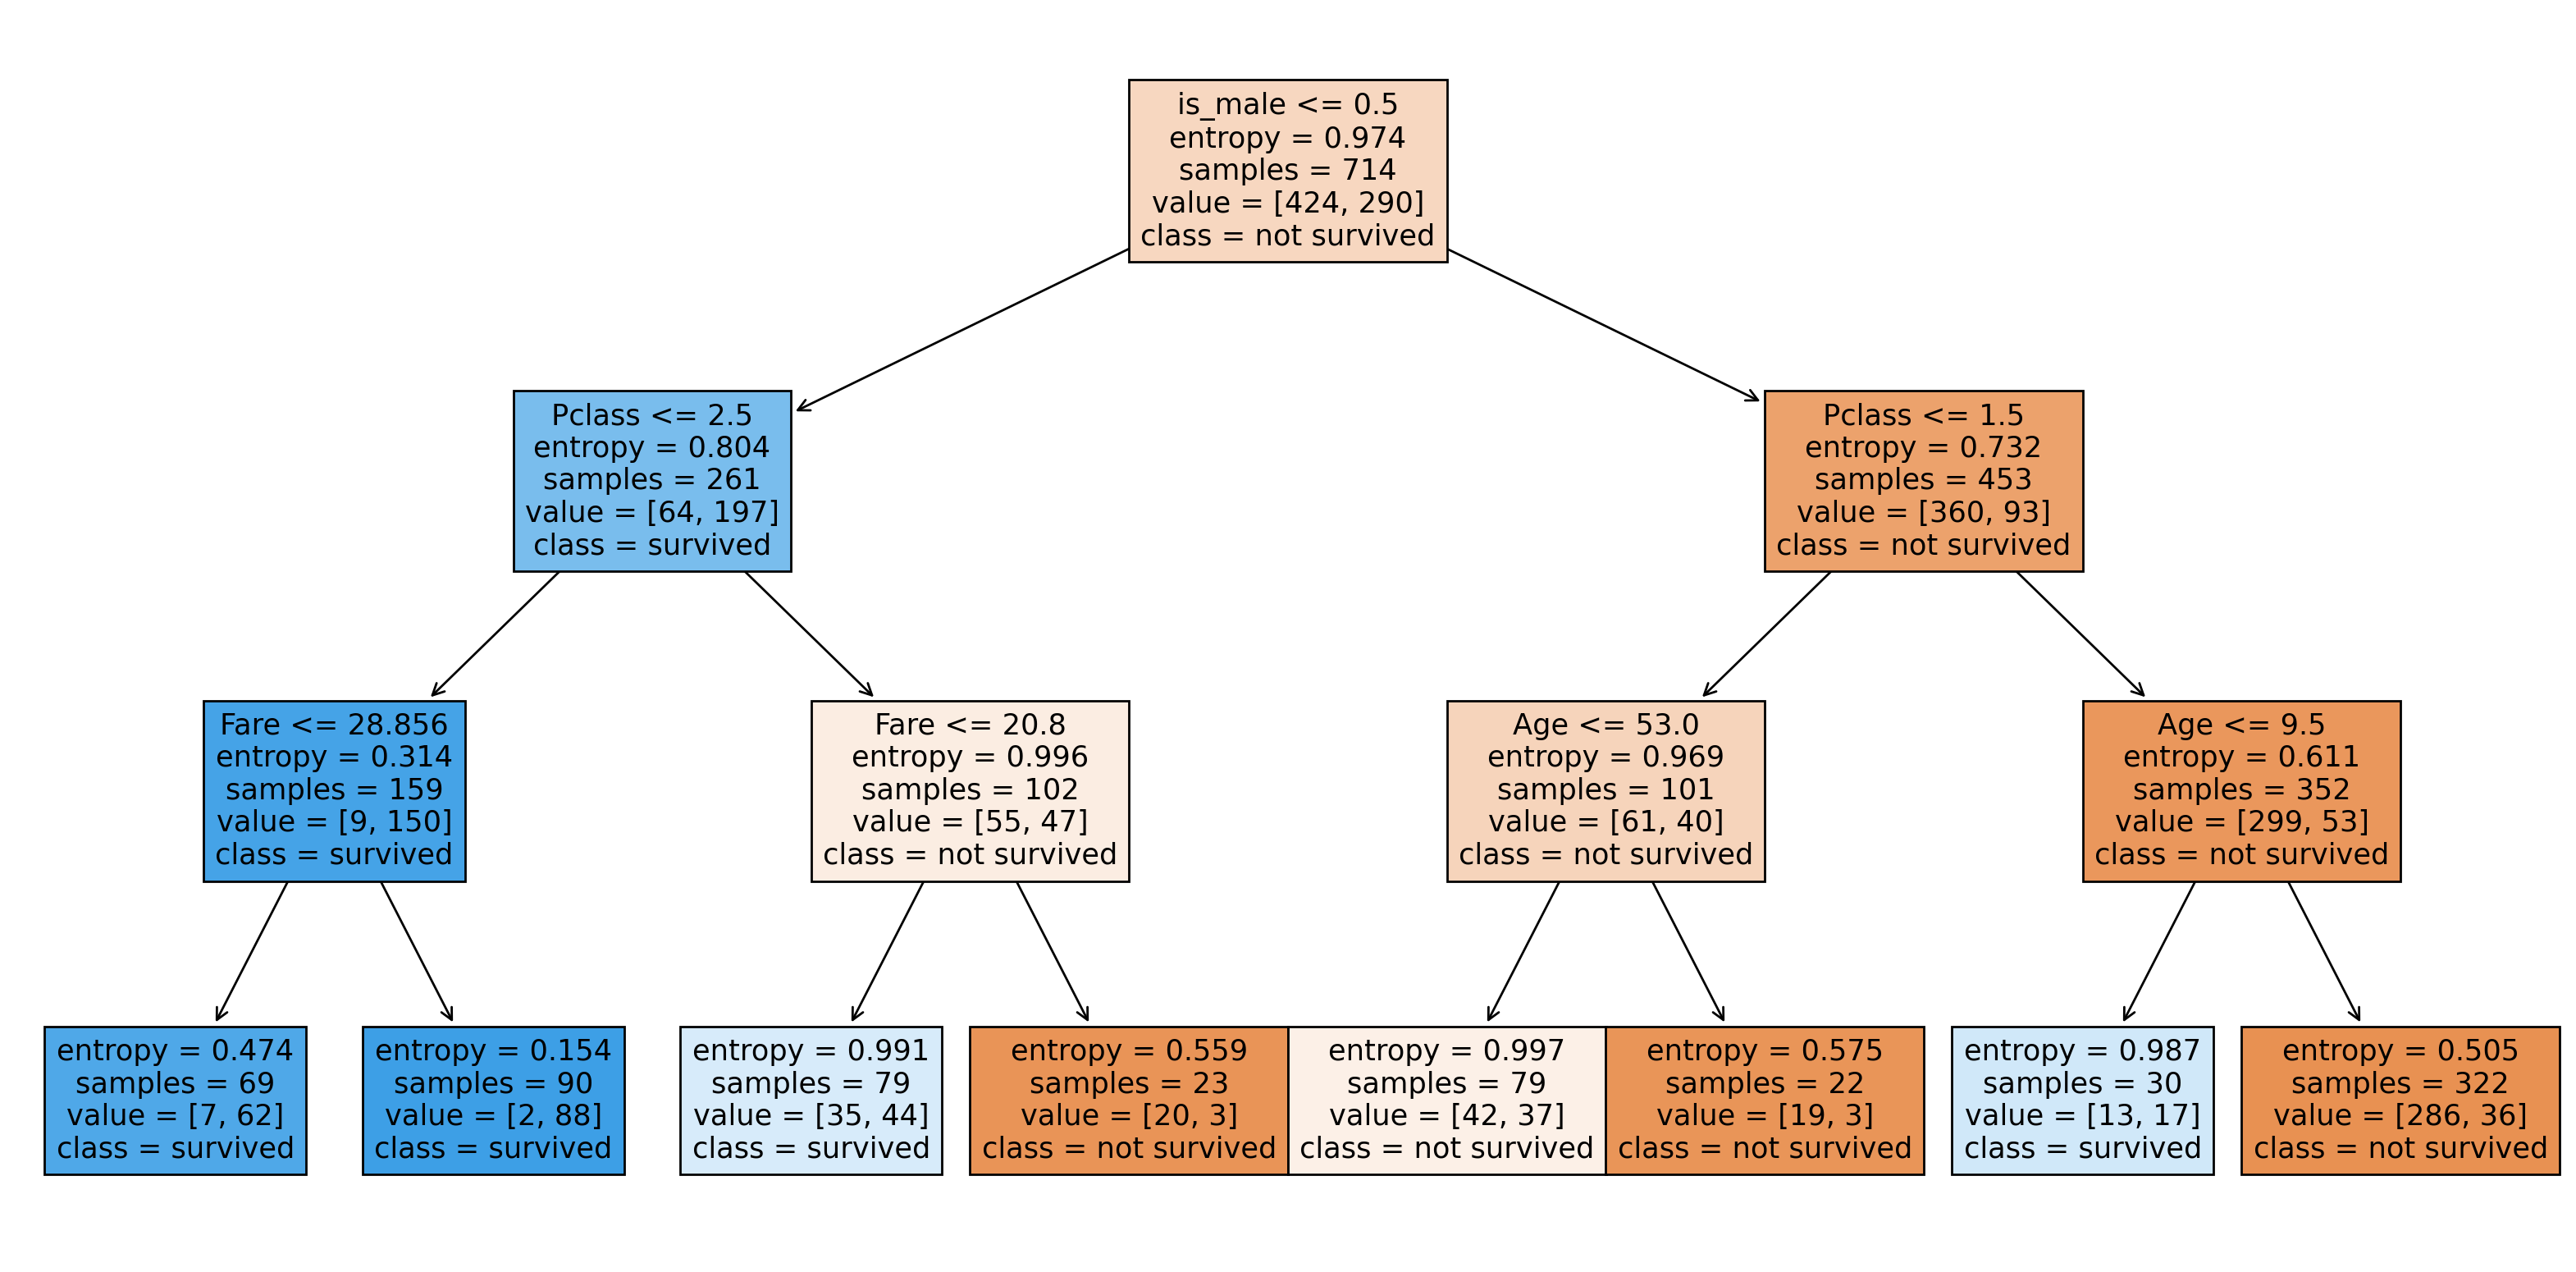

In [8]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
plt.figure(figsize=(20, 10), dpi=200)
plot_tree(decision_tree = decision_tree,
          feature_names=X.columns,
          class_names=['not survived', 'survived'],
          filled = True
         )
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
X_eğitim, X_test, y_eğitim, y_test =  train_test_split(X, y, test_size=0.20, random_state=111)

In [10]:
from sklearn.linear_model import LogisticRegression
titanic_karar_agaci = DecisionTreeClassifier(criterion='entropy', max_features=1,
                                     max_depth=4,random_state = 100)
titanic_karar_agaci.fit(X_eğitim, y_eğitim)

titanic_log_reg = LogisticRegression()
titanic_log_reg.fit(X_eğitim, y_eğitim)

LogisticRegression()

In [11]:
from sklearn.metrics import accuracy_score
y_tahmin_ka = titanic_karar_agaci.predict(X_test)
y_tahmin_lr = titanic_log_reg.predict(X_test)

print("Karar Ağacı Doğruluk Değeri        : {:.2f}".format(accuracy_score(y_test, y_tahmin_ka)))
print("Lojistik Regresyon Doğruluk Değeri : {:.2f}".format(accuracy_score(y_test, y_tahmin_lr)))

Karar Ağacı Doğruluk Değeri        : 0.74
Lojistik Regresyon Doğruluk Değeri : 0.79


Bu veri kümesi, üzerinde çalışılmış temizlenmiş bir veri kümesi olduğu için lojistik regresyonda da gayet başarılı bir sonuç elde ettik.